In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
from scipy.interpolate import griddata
from datetime import datetime, timedelta
import gsw
import datetime
import cartopy.crs as ccrs
from pathlib import Path
import cmasher as cmr
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=14

In [2]:
#EVD
ds01i=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_REF_intel/Vort_ice_*_julytosep_EXP_REF_intel.nc')
ds01u=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_REF_intel/u_245*_julytosep_EXP_REF_intel.nc')

ds03i=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_mfc_ori/Vort*julytosep_EXP_mfc_ori.nc')
ds03u=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_mfc_ori/u_245*julytosep_EXP_mfc_ori.nc')
ds04i=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_mfc_mod/Vort*julytosep_EXP_mfc_mod.nc')
ds04u=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_mfc_mod/u_245*julytosep_EXP_mfc_mod.nc')

# Bathymetry
bat=xr.open_dataset('/home/birte/MAUD_RISE_config/maud_v4/m12_mask/1_domain_cfg_50levels_new.nc')
bat.coords['lon']=bat.nav_lon
bat.coords['lat']=bat.nav_lat


In [3]:
ds01i.coords['glamt']=bat.glamt.swap_dims({'x':'x_c','y':'y_c'})
ds01i.coords['gphit']=bat.gphit.swap_dims({'x':'x_c','y':'y_c'})
ds03i.coords['glamt']=bat.glamt.swap_dims({'x':'x_c','y':'y_c'})
ds03i.coords['gphit']=bat.gphit.swap_dims({'x':'x_c','y':'y_c'})
ds04i.coords['glamt']=bat.glamt.swap_dims({'x':'x_c','y':'y_c'})
ds04i.coords['gphit']=bat.gphit.swap_dims({'x':'x_c','y':'y_c'})

In [4]:
ds01u.coords['depth']=(bat.e3t_1d.cumsum(dim='z')- 0.5*bat.e3t_1d.isel(z=0)).swap_dims({'z':'z_c'})
ds03u.coords['depth']=(bat.e3t_1d.cumsum(dim='z')- 0.5*bat.e3t_1d.isel(z=0)).swap_dims({'z':'z_c'})
ds04u.coords['depth']=(bat.e3t_1d.cumsum(dim='z')- 0.5*bat.e3t_1d.isel(z=0)).swap_dims({'z':'z_c'})

In [82]:
bat

<xarray.Dataset>
Dimensions:       (x: 295, y: 270, z: 50)
Coordinates:
    lon           (y, x) float32 -5.083 -5.0 -4.917 -4.833 ... 19.25 19.33 19.42
    lat           (y, x) float32 -70.53 -70.53 -70.53 ... -61.53 -61.53 -61.53
Dimensions without coordinates: x, y, z
Data variables: (12/41)
    nav_lon       (y, x) float32 -5.083 -5.0 -4.917 -4.833 ... 19.25 19.33 19.42
    nav_lat       (y, x) float32 -70.53 -70.53 -70.53 ... -61.53 -61.53 -61.53
    nav_lev       (z) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
    jpiglo        int32 295
    jpjglo        int32 270
    jpkglo        int32 50
    ...            ...
    e3f_0         (z, y, x) float64 ...
    e3uw_0        (z, y, x) float64 ...
    e3vw_0        (z, y, x) float64 ...
    bottom_level  (y, x) int32 0 0 0 0 0 0 0 0 0 ... 48 48 48 48 48 48 48 48 48
    top_level     (y, x) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1
    bathy_meter   (y, x) float32 7.168 7.168 7.168 ... 5.031e+03 5.051e+03

/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out

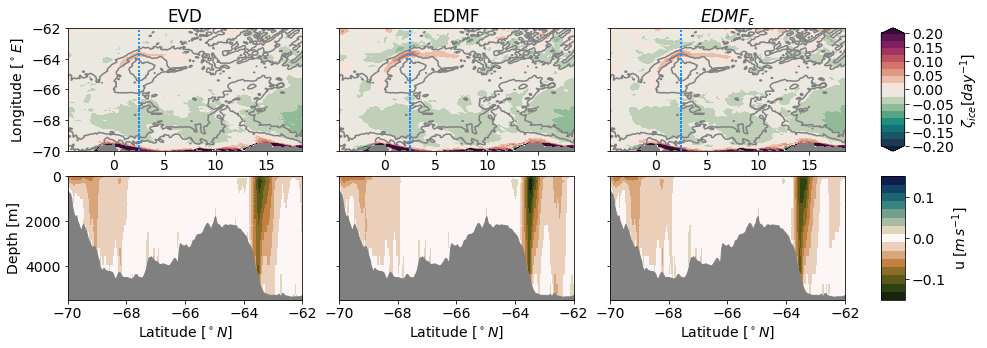

In [101]:
fig,axes=plt.subplots(2,4,figsize=(15,5),gridspec_kw={'width_ratios':[1,1,1,0.1]})

# plot winter mean sea ice vorticity ( july to september mean, 2007-2017)
lev=17
wmin=-.2
wmax=-1*wmin
cmapi=cmo.curl
ax=axes[0,0]
ds01i.vort_ice_ym.mean(dim='year').plot.pcolormesh(x="glamt",y="gphit",vmin=wmin,vmax=wmax,levels=lev,cmap=cmapi,ax=ax,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
ax.vlines(x=ds01u.glamu,ymin=-70,ymax=-62,color='dodgerblue',linestyle=':')
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('EVD')
ax.set_xlabel('Latitude [$^\circ N$]')
ax.set_ylabel('Longitude [$^\circ E$]')

ax=axes[0,1]
cbi=ds03i.vort_ice_ym.mean(dim='year').plot.pcolormesh(x="glamt",y="gphit",vmin=wmin,vmax=wmax,levels=lev,cmap=cmapi,ax=ax,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
ax.vlines(x=ds03u.glamu,ymin=-70,ymax=-62,color='dodgerblue',linestyle=':')
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('EDMF')
ax.set_yticklabels('')
ax.set_xlabel('Longitude [$^\circ E$]')
ax.set_ylabel('')
ax=axes[0,2]
ds04i.vort_ice_ym.mean(dim='year').plot.pcolormesh(x="glamt",y="gphit",vmin=wmin,vmax=wmax,levels=lev,cmap=cmapi,ax=ax,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
ax.vlines(x=ds04u.glamu,ymin=-70,ymax=-62,color='dodgerblue',linestyle=':')
ax.set_title('$EDMF_{\\epsilon}$')
ax.set_xlabel('Longitude [$^\circ E$]')
ax.set_ylabel('')
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_yticklabels('')
plt.colorbar(cbi,cax=axes[0,3],label='$\zeta_{ice} [day^{-1}$]')

# plot velocity section ( july to september mean, 2007-2017)
ulev=16
umin=-.15
umax=-1*umin
cmapu=cmo.tarn
ax=axes[1,0]
ds01u.u_245e_wm.mean(dim='year').plot.pcolormesh(x="gphiu",y="depth",ax=ax,vmin=umin,vmax=umax,levels=ulev,cmap=cmapu,add_colorbar=False)
ax.fill_between(ds04u.gphiu,bat.bathy_meter.isel(x=90),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_xlabel('Latitude [$^\circ N$]')
ax.set_ylabel('Depth [m]')
ax.set_title('')
ax.set_xlim(-70,-62)
ax=axes[1,1]
ds03u.u_245e_wm.mean(dim='year').plot.pcolormesh(x="gphiu",y="depth",ax=ax,vmin=umin,vmax=umax,levels=ulev,cmap=cmapu,add_colorbar=False)
ax.fill_between(ds04u.gphiu,bat.bathy_meter.isel(x=90),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_xlabel('Latitude [$^\circ N$]')
ax.set_xlim(-70,-62)
ax.set_title('')
ax=axes[1,2]
cbu=ds04u.u245e_wm.mean(dim='year').plot.pcolormesh(x="gphiu",y="depth",ax=ax,vmin=umin,vmax=umax,levels=ulev,cmap=cmapu,add_colorbar=False)
ax.fill_between(ds04u.gphiu,bat.bathy_meter.isel(x=90),6000,color='grey')
ax.set_ylim(0,5500)
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('Latitude [$^\circ N$]')
ax.set_xlim(-70,-62)
ax.set_yticklabels('')
ax.set_title('')
plt.colorbar(cbu,cax=axes[1,3],label='u [$m\,s^{-1}$]',ticks=np.arange(-0.1,0.2,0.1))

In [92]:
ds03u

<xarray.Dataset>
Dimensions:    (y_c: 270, year: 11, z_c: 50)
Coordinates:
  * year       (year) int64 2007 2008 2009 2010 2011 ... 2014 2015 2016 2017
  * z_c        (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    x_f        float64 90.5
  * y_c        (y_c) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
    glamu      (y_c) float64 dask.array<chunksize=(270,), meta=np.ndarray>
    gphiu      (y_c) float64 dask.array<chunksize=(270,), meta=np.ndarray>
    depth      (z_c) float64 0.5112 1.585 2.722 ... 5.499e+03 5.957e+03
Data variables:
    u_245e_wm  (year, z_c, y_c) float32 dask.array<chunksize=(1, 50, 270), meta=np.ndarray>

/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarn

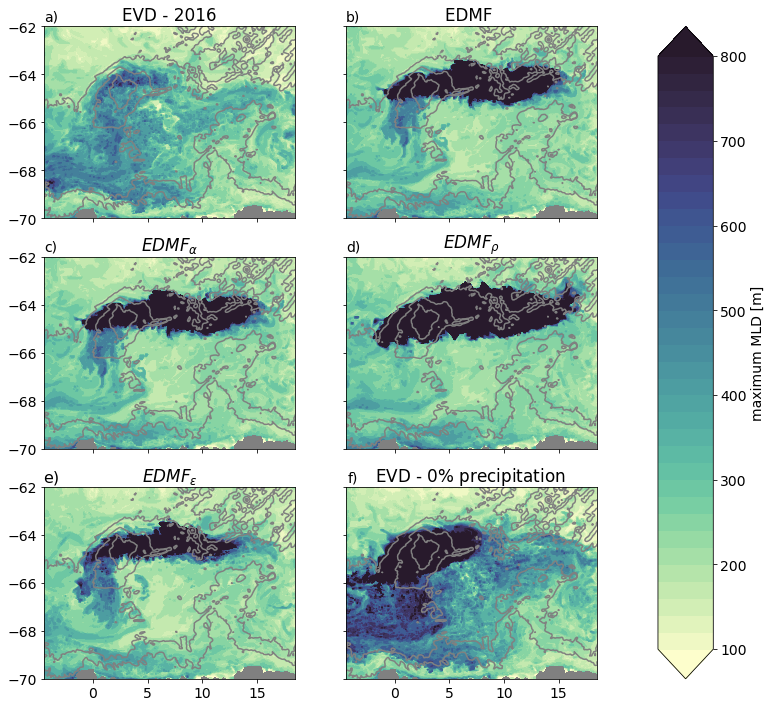

In [7]:
y=2016

fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,2, width_ratios=[1,.1],wspace=.2)#,wspace=0.3)
gs1 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], width_ratios=[1])
gs2 = GridSpecFromSubplotSpec(3, 2, subplot_spec=gs[0], width_ratios=[1,1])
col_ax = fig.add_subplot(gs1[0,0])
ax1 = fig.add_subplot(gs2[0,0])
ax2 = fig.add_subplot(gs2[0,1])
ax3 = fig.add_subplot(gs2[1,0])
ax4 = fig.add_subplot(gs2[1,1])
ax5 = fig.add_subplot(gs2[2,0])
ax6 = fig.add_subplot(gs2[2,1])


vamin = 100
vamax = 800
lev   = 36

ax=ax1
ds_no.mldr10_1.where(ds_no.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('EVD - %d'% y)
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylabel('')
ax.text(0.03, 1.05, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax2   
ds_c0.mldr10_1.where(ds_c0.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('EDMF ')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('')
ax.text(0.03, 1.05, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax3 
ds_c1.mldr10_1.where(ds_c1.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('$EDMF_{\\alpha}$')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.text(0.03, 1.05, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax4
ds_c2.mldr10_1.where(ds_c2.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('$EDMF_{\\rho}$')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(0.03, 1.05, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

ax=ax5
cbm=ds_c4.mldr10_1.where(ds_c4.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('$EDMF_{\\epsilon}$')
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(0.03, 1.05, 'e)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='16')

ax=ax6
ds_no_p0.mldr10_1.where(ds_no_p0.year==y).max(dim='time_counter').plot.contourf(x="nav_lon",y="nav_lat",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
bat.bathy_meter.plot.contour(x="lon",y="lat",ax=ax,levels=[2500,3500,5000],colors='grey')
bat.bathy_meter.where(bat.bathy_meter<1).plot.contourf(x="lon",y="lat",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('EVD - 0$\%$ precipitation ')
ax.set_xlabel('')
ax.set_yticklabels([])
ax.set_ylabel('')
ax.text(0.03, 1.05, 'f)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')


plt.colorbar(cbm,cax=col_ax,label='maximum MLD [m]',ticks=np.linspace(100,800,8))
plt.savefig(f'./max_mld_edmfs_{y}_plusextra.jpg',dpi=300)